## Working with images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('images/img1.jpg', cv2.IMREAD_GRAYSCALE)

In [5]:
#show the image with cv
cv2.imshow('image', img)

#hit any key to close the image
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#use matplotlib to show the image

plt.imshow(img, cmap='gray', interpolation='bicubic')
#we can do additional plotting too
plt.plot([50,100], [80,100], 'c', linewidth=5)
plt.show()

In [ ]:
#saving the image

cv2.imwrite('images/dog_gray.jpg',img)

## Working with videos

In [ ]:
#webcam capture
#1st webcam 
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read() #ret returns a true or false value and frame returns a frame
    cv2.imshow('frame', frame) #show the frame
    
    if cv2.waitKey(1) & 0xFF == ord('q'):  #hitting q will break the loop. waitkey(1) shows the frame for 1 ms
         break
        
cap.release() #will release the camera
cv2.destroyAllWindows()

### Changing video to gray

In [ ]:
#webcam capture
#1st webcam 
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read() #ret returns a true or false value and frame returns a frame
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # converts the frame to gray
    
    cv2.imshow('frame', frame) #show the frame
    cv2.imshow('gray', gray)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):  #hitting q will break the loop. waitkey(1) shows the frame for 1 ms
         break
        
cap.release() #will release the camera
cv2.destroyAllWindows()

### Saving a video

In [ ]:
#webcam capture
#1st webcam 
cap = cv2.VideoCapture(0)
w=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH ))
h=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT ))
#encoding
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
#write video to a file with 20 FPS and w,h as resolution
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (w,h))

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    try:
        #write the frame to the file
        out.write(frame)
    except:
        print('ERROR - Not writting to file')
    #show frames
    cv2.imshow('frame', frame)
    cv2.imshow('gray',gray)
    #breaking the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
#release the camera
cap.release()
#release the file
out.release()
cv2.destroyAllWindows()


## Drawing and writing on image with OpenCV

In [ ]:
my_img = cv2.imread('images/img2.jpg', cv2.IMREAD_COLOR)

#colors is defined by light in the computer realm. In cv2, it is BGR

#input image, staring point, ending point, color, linewidth

cv2.line(my_img, (0,0), (500,500), (255,255,255), 15)

#draw a rectangle

cv2.rectangle(my_img, (100,100), (500,500), (0,255,0), 5)

#draw a circle(origin, radius, color, width -> -1 will fill in the circle)

cv2.circle(my_img, (250,250), 100, (0,0,255), -1)

#draw a polygon

#define the points

pts = np.array([[50,50],[75,30],[100,200],[40,30],[500,200]], np.int32)

#draw

cv2.polylines(my_img, [pts], True, (0,255,255), 3)

#write text(image, text, position, font, fontsize, color, thickness, antialiasing)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(my_img, 'This is me!', (600,600), font, 1, (200,255,255), 2, cv2.LINE_AA)

#show the image

cv2.imshow('my_image', my_img)

#wait keys

cv2.waitKey(0)
cv2.destroyAllWindows()

## Image operations

In [ ]:
my_img2 = cv2.imread('images/img2.jpg', cv2.IMREAD_COLOR)

#We generally take the source as color, immediately convert it to grayscale and do analysis and superimpose the result on the color

#Reference a specific pixel
px = my_img2[55,55]
#print the channel values at that pixel(we get 227, 246, 249)
print("Old pixel value: " + str(px))

#Now we can modify that pixel

my_img2[55,55] = [255,255,255]
px_new = my_img2[55,55]
print("New Pixel value: " + str(px_new))

#ROI - Region of Image: It's just a subimage of an image

#roi = my_img2[100:150, 100:150]
#print(roi)

#make a region white
#my_img2[100:150, 100:150] = [255,255,255]

#copy a portion of the image to someplace else


face = my_img2[80:400, 200:500] #this portion is the region of my face

my_img2[0:320, 550:850] = face

cv2.imshow('my_img2', my_img2)

cv2.waitKey(0)
cv2.destroyAllWindows()


## Image arithmatic and logic

In [ ]:
img1 = cv2.imread('images/fantasy.jpg')
img2 = cv2.imread('images/ganges2.jpg')

#overlay two images
#add = img1 + img2
#alternate
#cv2.add(img1,img2) 

#In both cases We got a blown out image. What happened was (155,211,79) + (50,170,200) = (205,381,279) = (205,255,255)
#As 255 is the max value, many places got blown out

#So we will use addWeighted (img1, weight1, img2, weight2, gamma)
weighted = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)


cv2.imshow('weighted', weighted)

cv2.imwrite('overlayed.jpg', weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
##Now suppose I want to add a transparentish image to the existing image (like a logo)


img3 = cv2.imread('images/overlayed.jpg')
img4 = cv2.imread('images/natgeo.png')


rows, cols, channels = img4.shape
#defining the image of img3 for which we will cover it with img4
roi = img3[0:rows, 0:cols]

#Now we are going to create a mask of the logo and convert it.
img4_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

#Now we are going to apply a threshold (start value = 220, max value = 255). THRESH_BINARY_INV is the type of threshold
#If it is above 220, it will be converted to white, and if it is below 220, it will be converted to black
ret, mask = cv2.threshold(img4_gray, 220, 255, cv2.THRESH_BINARY_INV)

#cv2.imshow('mask', mask)
#Bitwise logical operator is just like the logical operator
mask_inv = cv2.bitwise_not(mask)

img3_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
img4_fg = cv2.bitwise_and(img4, img4, mask=mask)

dst = cv2.add(img3_bg, img4_fg)
img3[0:rows, 0:cols] = dst

cv2.imshow('res', img3)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Thresholding

The idea of thresholding is to further-simplify visual data for analysis. First, you may convert to gray-scale, but then you have to consider that grayscale still has at least 255 values. What thresholding can do, at the most basic level, is convert everything to white or black, based on a threshold value. Let's say we want the threshold to be 125 (out of 255), then everything that was 125 and under would be converted to 0, or black, and everything above 125 would be converted to 255, or white. If you convert to grayscale as you normally will, you will get white and black. If you do not convert to grayscale, you will get thresholded pictures, but there will be color.

While that sounds good enough, it often isn't. We will be covering multiple examples and different types of thresholding here to illustrate this.

In [6]:
img_book = cv2.imread('images/bookpage.jpg')

#We are taking 12 as lower limit as it is a very low light image
retval, threshold = cv2.threshold(img_book, 12, 255, cv2.THRESH_BINARY)

#grayscaled
img_book_gray = cv2.cvtColor(img_book, cv2.COLOR_BGR2GRAY)

retval2, threshold2 = cv2.threshold(img_book_gray, 12, 255, cv2.THRESH_BINARY)

#show both image

cv2.imshow('original', img_book)
cv2.imshow('threshold', threshold)
cv2.imshow('threshold2', threshold2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Gaussian adaptive thresholding

It will be adaptive based on the region we are in

In [7]:
#(image, max_value, adaptive threshold used, type of threshold converted to,
# blockSize – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
#C – Constant subtracted from the mean or weighted mean (see the details below). 
#Normally, it is positive but may be zero or negative as well.)

gauss = cv2.adaptiveThreshold(img_book_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

cv2.imshow('original', img_book)
cv2.imshow('threshold', threshold)
cv2.imshow('threshold2', threshold2)
cv2.imshow('gauss', gauss)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Otsu thresholding

This is not so good for this particular image

In [ ]:
retval3, otsu = cv2.threshold(img_book_gray, 125, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imshow('original', img_book)
cv2.imshow('threshold', threshold)
cv2.imshow('threshold2', threshold2)
cv2.imshow('otsu', otsu)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Color Filtering

In this OpenCV with Python tutorial, we're going to cover how to create a sort of filter, revisiting the bitwise operations, where we will filter for specifically a certain color, attempting to just show it. Alternatively, you could also specifically filter out a specific color, and then replace it with a scene, like we did with replacing a ROI (region of image) with something else, much like how a green screen works.

In order to filter like this you have a few options. Generally, you are probably going to convert your colors to HSV, which is "Hue Saturation Value." This can help you actually pinpoint a more specific color, based on hue and saturation ranges, with a variance of value, for example. If you wanted, you could actually produce filters based on BGR values, but this would be a bit more difficult. If you're having a hard time visualizing HSV, don't feel silly, check out the Wikipedia page on HSV, there is a very useful graphic there for you to visualize it. Hue for color, saturation for the strength of the color, and value for light is how I would best describe it personally. Now let's hop in.

In [2]:
cap = cv2.VideoCapture(0)

while True:
    # _ means we don't care about that value
    _, frame = cap.read()
    #We will use HSV for range purposes. H, S, V accounts for Color, Intensity and Light. So each one is very independent
    #of the other one whereas in RGB or BGR that's not the case
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #This values we will change by trial and error to filter out. remember they are in order H, S, V
    lower_blue = np.array([110,40,0])
    upper_blue = np.array([255,180,255])
    
    #defining our mask. Currently it is identical to the frame as everything is included
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    #In the frame, where frame is frame and mask is mask. So where there is something in the frame and the mask is True.
    #So the mask will be basically 0 or 1. So if it is in the range, it will be a 1, so white.
    #So in the bitwise operator, we see where the mask is 1, we show the color from the frame
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    
    k = cv2.waitKey(5) & 0xFF
    #ASCII for esc key is 27. Hit esc to quit
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()
    
    

### Blurring and smoothing

In this OpenCV with Python tutorial, we're going to be covering how to try to eliminate noise from our filters, like simple thresholds or even a specific color filter like we had before.

In [3]:
cap = cv2.VideoCapture(0)

while True:
    # _ means we don't care about that value
    _, frame = cap.read()
    #We will use HSV for range purposes. H, S, V accounts for Color, Intensity and Light. So each one is very independent
    #of the other one whereas in RGB or BGR that's not the case
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #This values we will change by trial and error to filter out. remember they are in order H, S, V
    lower_blue = np.array([110,40,0])
    upper_blue = np.array([255,180,255])
    
    #defining our mask. Currently it is identical to the frame as everything is included
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    #In the frame, where frame is frame and mask is mask. So where there is something in the frame and the mask is True.
    #So the mask will be basically 0 or 1. So if it is in the range, it will be a 1, so white.
    #So in the bitwise operator, we see where the mask is 1, we show the color from the frame
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    #Average of 15x15 pixels
    kernel = np.ones((15,15), np.float32)/225
    
    #apply a simple average of our frame
    smoothed = cv2.filter2D(res, -1, kernel)
    
    #Gaussian blur
    blur = cv2.GaussianBlur(res, (15,15), 0)
    
    #median blur
    median = cv2.medianBlur(res, 15)
    
    #Bilateral blur
    #pretty useless
    #bilateral = cv2.bilateralFilter(res, 15, 15, 75)
    
    cv2.imshow('frame', frame)
    #cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    #We got rid of a lot of background noise here, but we also lose clarity
    #cv2.imshow('smoothed', smoothed)
    cv2.imshow('blur', blur)
    cv2.imshow('median', median)
    #cv2.imshow('bilateral', bilateral)
    
    k = cv2.waitKey(5) & 0xFF
    #ASCII for esc key is 27. Hit esc to quit
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()
    
    

### Morphological Transformations

In this OpenCV, we're going to cover Morphological Transformations. These are some simple operations that we can perform based on the image's shape.

These tend to come in pairs. The first pair we're going to talk about is Erosion and Dilation. Erosion is where we will "erode" the edges. The way these work is we work with a slider (kernel). We give the slider a size, let's say 5 x 5 pixels. What happens is we slide this slider around, and if all of the pixels are white, then we get white, otherwise black. This may help eliminate some white noise. The other version of this is Dilation, which basically does the opposite: Slides around, if the entire area isn't black, then it is converted to white.

We will also explore openings and closings. The goal of openings is to remove false positives. So we will try to remove stuff from background.

Closings are going to remove false negatives. 

In [4]:
cap = cv2.VideoCapture(0)

while True:
    # _ means we don't care about that value
    _, frame = cap.read()
    #We will use HSV for range purposes. H, S, V accounts for Color, Intensity and Light. So each one is very independent
    #of the other one whereas in RGB or BGR that's not the case
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #This values we will change by trial and error to filter out. remember they are in order H, S, V
    lower_blue = np.array([110,40,0])
    upper_blue = np.array([255,180,255])
    
    #defining our mask. Currently it is identical to the frame as everything is included
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    #In the frame, where frame is frame and mask is mask. So where there is something in the frame and the mask is True.
    #So the mask will be basically 0 or 1. So if it is in the range, it will be a 1, so white.
    #So in the bitwise operator, we see where the mask is 1, we show the color from the frame
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    kernel_erosion = np.ones((20,20), np.uint8)
    
    #erosion
    erosion = cv2.erode(mask, kernel, iterations=1)
    
    #dilation
    dilation = cv2.dilate(mask, kernel, iterations=1)
    
    #openings
    openings = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    #closings
    closings = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    cv2.imshow('frame', frame)
    #cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    cv2.imshow('erosion', erosion)
    cv2.imshow('dilation', dilation)
    cv2.imshow('openings', openings)
    cv2.imshow('closings', closings)
    
    k = cv2.waitKey(5) & 0xFF
    #ASCII for esc key is 27. Hit esc to quit
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()
    
    

## Edge Detection

In this section, we'll be covering image gradients and edge detection. Image gradients can be used to measure directional intensity, and edge detection does exactly what it sounds like: it finds edges!


Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter. Please see the docs for kernels used.

It calculates the Laplacian of the image given by the relation, \Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2} where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:

kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0  \end{bmatrix}


### Canny
First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge_Gradient(G)=|Gx|+|Gy|. By default, it is False.

In [13]:
cap = cv2.VideoCapture(0)

while True:
    # _ means we don't care about that value
    _, frame = cap.read()
    
    #These gradients can be used for directional intensity in some cases
    laplacian = cv2.Laplacian(frame,cv2.CV_64F)
    sobelx = cv2.Sobel(frame, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(frame, cv2.CV_64F, 0, 1, ksize=5)
    
    #But there are built in edge detectors
    edges = cv2.Canny(frame, 100, 200)
    
    cv2.imshow('original', frame)
    #cv2.imshow('laplacian', laplacian)
    cv2.imshow('sobelx', sobelx)
    cv2.imshow('sobely', sobely)
    cv2.imshow('edges', edges)
    

    
    #This values we will change by trial and error to filter out. remember they are in order H, S, V
    k = cv2.waitKey(5) & 0xFF
    #ASCII for esc key is 27. Hit esc to quit
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()
    
    

## Template Matching

In this section we're going to cover a fairly basic version of object recognition. The idea here is to find identical regions of an image that match a template we provide, giving a certain threshold. For exact object matches, with exact lighting/scale/angle, this can work great. An example where these conditions are usually met is just about any GUI on the computer. The buttons and such are always the same, so you can use template matching. Pair template matching with some mouse controls and you've got yourself a web-based bot!

To start, you will need a main image, and a template. You should take your template from the exact "thing" you are looking for in the image. I will provide an image as an example, but feel free to use an image of your favorite website or something like that.



In [28]:
#Load the image and convert it to gray
img_bgr = cv2.imread('images/template_matching_main.jpg')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

#Load the template
template = cv2.imread('images/template_matching_template.jpg', 0)
#Width and height of template. reverse a list/array.﻿
w, h = template.shape[::-1]

#Make the match
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_bgr)

cv2.waitKey(0)
cv2.destroyAllWindows()

## GrabCut Foreground Extraction

 The idea here is to find the foreground, and remove the background. This is much like what a green screen does, only here we wont actually need the green screen.

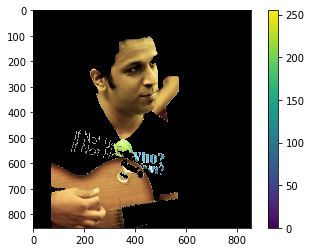

In [76]:
img_me = cv2.imread('images/img2.jpg')

mask = np.zeros(img_me.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)
#head
#rect = (200,100,349,300)
#body
rect = (70,70,500,800)

#grabCut grab and cut a certain region
cv2.grabCut(img_me, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

img_me = img_me*mask2[:,:,np.newaxis]

plt.imshow(cv2.cvtColor(img_me, cv2.COLOR_BGR2RGB))
plt.colorbar()
plt.show()


## Corner Detection

The purpose of detecting corners is to track things like motion, do 3D modeling, and recognize objects, shapes, and characters.

In [81]:
img_corner = cv2.imread('images/corner_detect.jpg')
corner_gray = cv2.cvtColor(img_corner, cv2.COLOR_BGR2GRAY)
corner_gray = np.float32(corner_gray)

#(image, corners to find, quality, min dist to corners)

corners = cv2.goodFeaturesToTrack(corner_gray, 200, 0.01, 10)
corners = np.int0(corners)

for corner in corners:
    #Return a contiguous flattened array.
    x, y = corner.ravel()
    cv2.circle(img_corner, (x,y), 3, 255, -1)
    
cv2.imshow('Corner', img_corner)

cv2.waitKey(0)
cv2.destroyAllWindows()
    
    

## Feature Matching(Homography) Brute force

 Feature matching is going to be a slightly more impressive version of template matching, where a perfect, or very close to perfect, match is required. This time our template can have different lighting, angles and rotations.
 
ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance. First it use FAST to find keypoints, then apply Harris corner measure to find top N points among them. It also use pyramid to produce multiscale-features. But one problem is that, FAST doesn't compute the orientation. So what about rotation invariance? Authors came up with following modification.

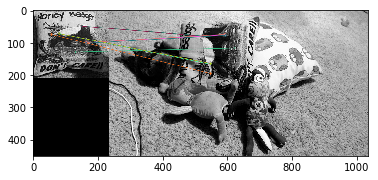

In [87]:
img_main = cv2.imread('images/feature_matching_image.jpg', 0)
img_template = cv2.imread('images/feature_matching_template.jpg', 0)
cv2.ocl.setUseOpenCL(False)
orb = cv2.ORB_create()

#keypoints, descriptors
kp1, des1 = orb.detectAndCompute(img_template,None)
kp2, des2 = orb.detectAndCompute(img_main,None)

#Brute force matcher (Norm_hamming - distance measurement)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1,des2)
#sorted based on most likely a match to least likely a match
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img_template,kp1,img_main,kp2,matches[:10],None, flags=2)
plt.imshow(img3)
plt.show()

## MOG Background Reduction

In this section, we're going to be covering how to reduce the background of images, by detecting motion. This is going to require us to re-visit the use of video, or to have two images, one with the absense of people/objects you want to track, and another with the objects/people there. You can use your webcam if you like.

In [11]:
import cv2
cv2.ocl.setUseOpenCL(False)
#cap = cv2.VideoCapture('images/people-walking.mp4')
cap = cv2.VideoCapture(0)
#cv2.ocl.setUseOpenCL(False)
fgbg = cv2.createBackgroundSubtractorMOG2()
#knn = cv2.createBackgroundSubtractorKNN()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
 
    cv2.imshow('fgmask',frame)
    cv2.imshow('frame',fgmask)

    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    

cap.release()
cv2.destroyAllWindows()

## Haar Cascade Object Detection Face & Eye 

In this OpenCV section, we're going to discuss object detection with Haar Cascades. We'll do face and eye detection to start. In order to do object recognition/detection with cascade files, you first need cascade files. For the extremely popular tasks, these already exist. Detecting things like faces, cars, smiles, eyes, and license plates for example are all pretty prevalent.

First, I will show you how to use these cascade files, then I will show you how to embark on creating your very own cascades, so that you can detect any object you want, which is pretty darn cool!

You can use Google to find various Haar Cascades of things you may want to detect. You shouldn't have too much trouble finding the aforementioned types. We will use a Face cascade and Eye cascade. You can find a few more at the root directory of Haar cascades. Note the license for using/distributing these Haar Cascades.

In [3]:
import numpy as np
import cv2

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

## Making your own Haar Cascade Intro

In this section, you will be shown how to create your very own Haar Cascades, so you can track any object you want. Due to the nature and complexity of this task, this tutorial will be a bit longer than usual, but the reward is massive.

While you *can* do this in Windows, I would not suggest it. Thus, for this tutorial, I am going to be using a Linux VPS, and I recommend you do the same. You can try to use the free tier from Amazon Web Services, though it may be painfully too slow for you, and you will likely need more RAM. I would recommend at least 2GB of RAM for what we will be doing. Most hosts nowadays charge by the hour, including Digital Ocean. Thus, you can buy a $20/mo server, use it for a day, take the files you want, and then terminate the server and pay a very small amount of money.

In [ ]:
import urllib.request
import cv2
import numpy as np
import os

def store_raw_images():
    neg_images_link = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n00523513'   
    neg_image_urls = urllib.request.urlopen(neg_images_link).read().decode()
    pic_num = 1
    
    if not os.path.exists('neg'):
        os.makedirs('neg')
        
    for i in neg_image_urls.split('\n'):
        try:
            print(i)
            urllib.request.urlretrieve(i, "neg/"+str(pic_num)+".jpg")
            img = cv2.imread("neg/"+str(pic_num)+".jpg",cv2.IMREAD_GRAYSCALE)
            # should be larger than samples / pos pic (so we can place our image on it)
            resized_image = cv2.resize(img, (100, 100))
            cv2.imwrite("neg/"+str(pic_num)+".jpg",resized_image)
            pic_num += 1
            
        except Exception as e:
            print(str(e))  
            
store_raw_images()

http://www.landon.net/uploaded/top_banner_photos/AthleticsTemp.jpg
HTTP Error 404: Not Found
http://www.nait.ca/athletics/images/mbasketball_main.JPG
HTTP Error 404: Not Found
http://www.eindhovensesportraad.nl/UserFiles/Image/atletiek%20DSC_6707web.JPG
HTTP Error 404: Not Found
http://extras.mnginteractive.com/live/media/site571/2009/0312/20090312__ecct0313athletics~1_Viewer.JPG
HTTP Error 404: Not Found
http://www.hsc.edu/athletics/football/images/simpson_act.jpg
HTTP Error 404: Not Found
http://www.canton.edu/athletics/m_lacrosse/images/kolb(act).jpg
HTTP Error 404: Not Found
http://s7ondemand1.scene7.com/is/image/roadrunnersports/PRO105?wid=323&hei=238
http://www.act.edu/news_images/20060105115450275.jpg
C:\projects\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:3229: error: (-215) ssize.area() > 0 in function cv::resize

http://static.flickr.com/3199/3024707873_320c34433a.jpg
http://harbor.laccd.omniupdate.com/athletics/womenssoccer/teampic0607.jpg
<urlopen error [Errno 1100

In [ ]:
def find_uglies():
    match = False
    for file_type in ['neg']:
        for img in os.listdir(file_type):
            for ugly in os.listdir('uglies'):
                try:
                    current_image_path = str(file_type)+'/'+str(img)
                    ugly = cv2.imread('uglies/'+str(ugly))
                    question = cv2.imread(current_image_path)
                    if ugly.shape == question.shape and not(np.bitwise_xor(ugly,question).any()):
                        print('That is one ugly pic! Deleting!')
                        print(current_image_path)
                        os.remove(current_image_path)
                except Exception as e:
                    print(str(e))

In [ ]:
def store_raw_images():
    neg_images_link = '//image-net.org/api/text/imagenet.synset.geturls?wnid=n07942152'   
    neg_image_urls = urllib.request.urlopen(neg_images_link).read().decode()
    pic_num = 953
    
    if not os.path.exists('neg'):
        os.makedirs('neg')
        
    for i in neg_image_urls.split('\n'):
        try:
            print(i)
            urllib.request.urlretrieve(i, "neg/"+str(pic_num)+".jpg")
            img = cv2.imread("neg/"+str(pic_num)+".jpg",cv2.IMREAD_GRAYSCALE)
            # should be larger than samples / pos pic (so we can place our image on it)
            resized_image = cv2.resize(img, (100, 100))
            cv2.imwrite("neg/"+str(pic_num)+".jpg",resized_image)
            pic_num += 1
            
        except Exception as e:
            print(str(e)) 

In [ ]:
def create_pos_n_neg():
    for file_type in ['neg']:
        
        for img in os.listdir(file_type):

            if file_type == 'pos':
                line = file_type+'/'+img+' 1 0 0 50 50\n'
                with open('info.dat','a') as f:
                    f.write(line)
            elif file_type == 'neg':
                line = file_type+'/'+img+'\n'
                with open('bg.txt','a') as f:
                    f.write(line)

1. opencv_createsamples -img cookie.jpg -bg bg.txt -info info/info.lst -pngoutput info -maxxangle 0.5 -maxyangle 0.5 -maxzangle 0.5 -num 1950

2. opencv_createsamples -info info/info.lst -num 1950 -w 20 -h 20 -vec positives.vec

3. opencv_traincascade -data data -vec positives.vec -bg bg.txt -numPos 1800 -numNeg 900 -numStages 10 -w 20 -h 20



In [9]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

#this is the cascade we just made. Call what you want
watch_cascade = cv2.CascadeClassifier('haarcascades/cascade.xml')

cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # add this
    # image, reject levels level weights.
    watches = watch_cascade.detectMultiScale(gray, 7, 7)
    
    # add this
    for (x,y,w,h) in watches:
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,'Cookie',(x-w,y-h), font, 0.5, (11,255,255), 2, cv2.LINE_AA)
        
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

        
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
#Load the image and convert it to gray
img_bgr = cv2.imread('images/template_matching_main.jpg')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

#Load the template
template = cv2.imread('lighter.jpg', 0)
#Width and height of template. reverse a list/array.﻿
w, h = template.shape[::-1]

#Make the match
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_bgr)

cv2.waitKey(0)
cv2.destroyAllWindows()